<a target="_blank" href="https://colab.research.google.com/github/Richmaninoff/introgeodf/blob/main/Tarea2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [3]:
#pip install geopandas
#pip install thefuzz

In [4]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [5]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [6]:
#Las dimensiones 
countries.shape

(252, 2)

Part I

Complete all the exercises in Python, but prepare the visual in R.
Publish the Python code (as html or colab), and publish the visuals in R.

PART I

- Ejercicio 1: 
Commit and push the recently created geopackage.

Get the link from Github to read the geopackage into R.

Using the sf library in R, confirm the layers created (use st_layers), and open each map (read_sf). Draw the three layers (as we did in Python) using ggplot.

- Ejercicio 2:

Follow the same steps in this last section, but use Peru.
Plot your three layers in R.
- Ejercicio 3:

Reproject your maps of Peru.
Find the airports for Peru: The data is in a CSV file.
Create projected layer of airports.
Plot all the layers in R.
- Ejercicio 4:

Add the column "continent" to the 'theMapAndData' using the file from this link from kagle.
Keep the American continent.
Compute the centroids of the countries in America
Use the centroids to represent the fragility (Total_ei5) of 2020 in a map using R.


### Ejercicio 1: 

Despues de haber creado el archivo GPKG y subirlo a Github se ha obtenido el enlace del archivo que nos ayudará a visualizar en mapa en R

https://github.com/Richmaninoff/introgeodf/blob/main/maps/worldMap.gpkg

A continuación vamos  R para generar los gráficos 

In [7]:
#RPUB: 

### Ejercicio 2:

- Follow the same steps in this last section, but use Peru.
- Plot your three layers in R.

In [8]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
#countries es el DF, de hecho es el archivo que posees

In [9]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [10]:
peru=countries[countries.COUNTRY=='Peru']

But you can also subset by clipping, as sometimes other data frames may not have the same fields for filtering:



In [11]:
citiesperu_clipped = gpd.clip(gdf=cities,
                          mask=peru)
riversperu_clipped = gpd.clip(gdf=rivers,
                               mask=peru)

<Axes: >

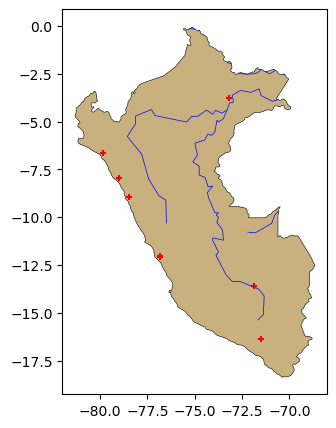

In [12]:
#plot the clipped version:

base = peru.plot(facecolor="#C8B17F", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesperu_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversperu_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [13]:
peru.geom_type


172    Polygon
dtype: object

In [14]:
citiesperu_clipped.geom_type


269    Point
339    Point
529    Point
317    Point
423    Point
260    Point
476    Point
422    Point
dtype: object

In [15]:
riversperu_clipped.geom_type


59         LineString
1     MultiLineString
60    MultiLineString
85         LineString
65         LineString
dtype: object

### Ejercicio 3:

Reproject your maps of Peru.
Find the airports for Peru:https://ourairports.com/data/ The data is in a CSV file.
Create projected layer of airports.
Plot all the layers in R.

In [16]:
# recommended for peru (meters)
peru.to_crs(4326).crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [17]:
peru.to_crs(4326).centroid


C:\Users\Ricardo\AppData\Local\Temp\ipykernel_6860\612466451.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru.to_crs(4326).centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_6860\181689520.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru.to_crs(4326).centroid.plot(color='red',ax=base4326)


<Axes: >

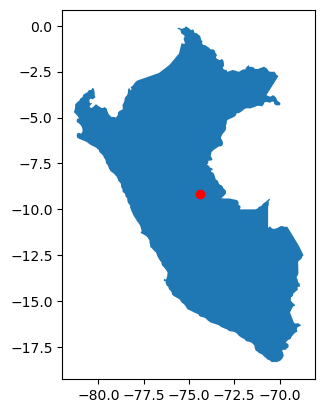

In [19]:
# replotting:

base4326=peru.to_crs(4326).plot()
peru.to_crs(4326).centroid.plot(color='red',ax=base4326)

In [20]:
peru_4326=peru.to_crs(4326)

cities_peru_4326=citiesperu_clipped.to_crs(peru_4326.crs)

rivers_peru_4326=riversperu_clipped.to_crs(peru_4326.crs)

In [22]:
# saving 
import os

peru_4326.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='country', driver="GPKG")
cities_peru_4326.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='cities', driver="GPKG")
rivers_peru_4326.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='rivers', driver="GPKG")

In [23]:
peru_4326.centroid


C:\Users\Ricardo\AppData\Local\Temp\ipykernel_6860\3754036082.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru_4326.centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

In [24]:
peru_4326.centroid.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='centroid', driver="GPKG")

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_6860\3614473474.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru_4326.centroid.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='centroid', driver="GPKG")


In [75]:
#ahora importamos la data de aeropuertos 

import pandas as pd
infoairports=pd.read_csv(os.path.join("data","pe_airports.csv"))

In [76]:
infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6217,SPIM,large_airport,Jorge Chávez International Airport,-12.021900,-77.114305,113.0,SA,Peru,PE,...,Lima,1,SPJC,LIM,NaN,http://www.lap.com.pe/,https://en.wikipedia.org/wiki/Jorge_Ch%C3%A1ve...,"SPIM, SPJC",1050,2021-05-03T09:18:25+00:00
1,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535700,-71.938797,10860.0,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
2,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.341101,-71.583099,8405.0,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
3,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100,-70.158203,12552.0,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
200,351487,PE-0013,heliport,Pucallpa Air Force Heliport,-8.351500,-74.581900,505.0,SA,Peru,PE,...,Pucallpa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:32:29+00:00
201,351489,PE-0015,heliport,Puerto Anapati Heliport,-11.928590,-73.987700,1496.0,SA,Peru,PE,...,Puerto Anapati,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:37:03+00:00
202,351491,PE-0017,heliport,Puerto Ocopa Heliport,-11.147930,-74.306290,1056.0,SA,Peru,PE,...,Puerto Ocopa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:40:40+00:00
203,351492,PE-0018,heliport,Tanquin Heliport,-12.126320,-74.075990,1880.0,SA,Peru,PE,...,Tanquin,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:42:05+00:00


In [77]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535700,-71.938797,10860.0,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
1,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.341101,-71.583099,8405.0,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
2,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100,-70.158203,12552.0,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
3,6242,SPZA,medium_airport,Maria Reiche Neuman Airport,-14.854000,-74.961502,1860.0,SA,Peru,PE,...,Nazca,1,SPZA,NZC,NaN,https://www.aeronasca.com/como-llegar-al-aerop...,https://en.wikipedia.org/wiki/Maria_Reiche_Neu...,NaN,750,2022-04-07T13:53:44+00:00
4,6232,SPQT,medium_airport,Coronel FAP Francisco Secada Vignetta Internat...,-3.784740,-73.308800,306.0,SA,Peru,PE,...,Iquitos,1,SPQT,IQT,NaN,NaN,https://en.wikipedia.org/wiki/Crnl._FAP_Franci...,NaN,750,2022-08-29T12:46:38+00:00


In [92]:
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [93]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [94]:
infoairports.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           203 non-null    object 
 1   type           203 non-null    object 
 2   latitude_deg   203 non-null    float64
 3   longitude_deg  203 non-null    float64
 4   elevation_ft   191 non-null    float64
 5   region_name    203 non-null    object 
 6   municipality   195 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


In [105]:
# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           203 non-null    object 
 1   type           203 non-null    object 
 2   latitude_deg   203 non-null    float64
 3   longitude_deg  203 non-null    float64
 4   elevation_ft   191 non-null    float64
 5   region_name    203 non-null    object 
 6   municipality   195 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


In [106]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

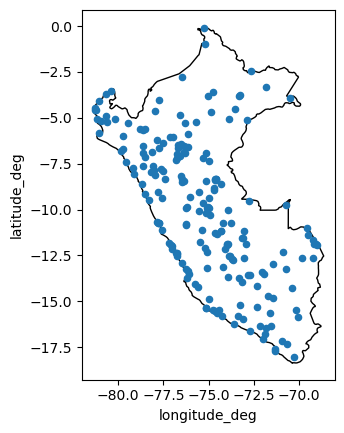

In [109]:
base = peru_4326.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [110]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=peru.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

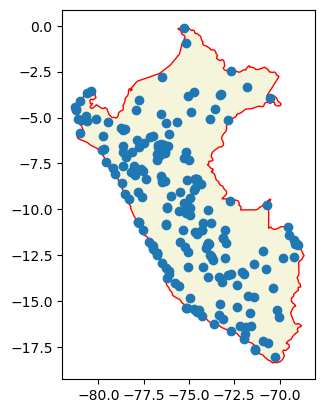

In [114]:

base = peru_4326.plot(color='beige', edgecolor='red')
airports.plot(ax=base)

In [115]:
type(airports), type(infoairports)


(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

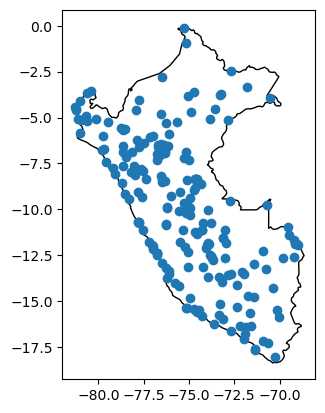

In [116]:
airports_4326=airports.to_crs(4326)

## then

base = peru_4326.plot(color='white', edgecolor='black')
airports_4326.plot(ax=base)

In [117]:
airports_4326['type'].value_counts()

type
small_airport     142
medium_airport     29
closed             25
heliport            6
large_airport       1
Name: count, dtype: int64

In [119]:
airports_4326.rename(columns={'type':'kind'},inplace=True)

In [142]:
airports_4326.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='airports', driver="GPKG")

In [145]:
output_path = os.path.join("maps", "peruoair_4326.shp")

# Guarda el GeoDataFrame como Shapefile
airports_4326.to_file(output_path, driver="ESRI Shapefile")

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_6860\211766809.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  airports_4326.to_file(output_path, driver="ESRI Shapefile")


In [146]:
print(output_path)


maps\peruoair_4326.shp


### Ejercicio 4:

Add the column "continent" to the 'theMapAndData' using the file from this link from kagle: https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region?resource=download
Keep the American continent.
Compute the centroids of the countries in America
Use the centroids to represent the fragility (Total_ei5) of 2020 in a map using R.

In [123]:
fragilityLink="https://github.com/SocialAnalytics-StrategicIntelligence/TableOperations/raw/main/dataFiles/fragility/fragilityCoded_2012_2023.pkl"

fragility=pd.read_pickle(fragilityLink)

fragility.head()

,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,P1_StateLegitimacy,P2_PublicServices,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention,iso2,iso3,Total_mnmx
0,SOMALIA,2013,113.900000,9.7,10.0,9.3,9.4,8.4,8.9,9.500000,9.8,10.0,9.5,10.0,9.400000,SO,SOM,10.000000
1,SOMALIA,2023,111.900000,9.5,10.0,8.7,9.5,9.1,8.6,9.600000,9.8,9.0,10.0,9.0,9.100000,SO,SOM,10.000000
2,SOMALIA,2018,113.200796,9.7,10.0,9.0,8.9,9.3,9.5,9.119045,9.3,9.6,10.0,9.7,9.081752,SO,SOM,9.983597
3,SOMALIA,2014,112.600000,9.4,10.0,9.3,9.1,8.7,8.9,9.100000,9.6,9.8,9.5,10.0,9.200000,SO,SOM,9.968153
4,SOMALIA,2015,114.000000,9.7,10.0,9.5,9.1,9.0,9.2,9.300000,9.3,10.0,9.6,9.8,9.500000,SO,SOM,9.948347


In [124]:
countries['COUNTRY']=countries.COUNTRY.str.upper()


In [125]:
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

In [126]:
onlyFragil

{'BRUNEI DARUSSALAM',
 'CONGO DEMOCRATIC REPUBLIC',
 'CONGO REPUBLIC',
 "COTE D'IVOIRE",
 'ESWATINI',
 'GUINEA BISSAU',
 'KYRGYZ REPUBLIC',
 'MICRONESIA',
 'SAMOA',
 'SLOVAK REPUBLIC',
 'TIMOR-LESTE'}

In [127]:
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAYMAN ISLANDS (UK)',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'EAST TIMOR',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'GUINEA-BISSAU',
 'HEARD ISLAND & MCDONALD ISLANDS (AUSTRALIA)',
 'HOWLAND ISLAND (US)',
 'ISLE OF MAN (UK)',
 'IVORY COAST',
 'JAN MAYEN (NORWAY)',

In [128]:
# se realiza el fuzzing
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO REPUBLIC', ('CONGO', 90)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('KYRGYZ REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 86)),
 ('MICRONESIA', ('FEDERATED STATES OF MICRONESIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SLOVAK REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [129]:
# subsetting
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil) 
 if process.extractOne(country,onlyMap)[1]>=90]

[('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO REPUBLIC', ('CONGO', 90)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('MICRONESIA', ('FEDERATED STATES OF MICRONESIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90))]

In [130]:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragil) 
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BRUNEI DARUSSALAM': 'BRUNEI',
 'CONGO DEMOCRATIC REPUBLIC': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO REPUBLIC': 'CONGO',
 'GUINEA BISSAU': 'GUINEA-BISSAU',
 'MICRONESIA': 'FEDERATED STATES OF MICRONESIA',
 'SAMOA': 'AMERICAN SAMOA (US)'}

In [131]:
fragility.Country.replace(try1,inplace=True)

# updating
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KYRGYZ REPUBLIC', ('KYRGYZSTAN', 68)),
 ('SLOVAK REPUBLIC', ('SLOVAKIA', 77)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [132]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragil) 
 if process.extractOne(country,onlyMap)[1]!=60}
try2

{"COTE D'IVOIRE": 'IVORY COAST',
 'KYRGYZ REPUBLIC': 'KYRGYZSTAN',
 'SLOVAK REPUBLIC': 'SLOVAKIA',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [133]:
# changing
fragility.Country.replace(try2,inplace=True)

# new update
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[('ESWATINI', ('MARTINIQUE (FRANCE)', 60))]

In [134]:
fragility.Country.replace({'ESWATINI': 'SWAZILAND'},inplace=True)

#
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

# 
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[]

In [135]:
### creando the MapAndData

In [136]:
theMapAndData=countries.merge(fragility,left_on='COUNTRY', right_on='Country')
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Country                      1969 non-null   object  
 3   Year                         1969 non-null   int64   
 4   Total                        1969 non-null   float64 
 5   C1_SecurityApparatus         1969 non-null   float64 
 6   C2_FactionalizedElites       1969 non-null   float64 
 7   C3_GroupGrievance            1969 non-null   float64 
 8   E1_Economy                   1969 non-null   float64 
 9   E2_EconomicInequality        1969 non-null   float64 
 10  E3_HumanFlightandBrainDrain  1969 non-null   float64 
 11  P1_StateLegitimacy           1969 non-null   float64 
 12  P2_PublicServices            1969 non-null   float64 


In [148]:
theMapAndData['Total_mnmx'].describe()

count    1969.000000
mean        5.336034
std         2.484143
min         0.000000
25%         3.545360
50%         5.707298
75%         7.111345
max        10.000000
Name: Total_mnmx, dtype: float64

<Axes: >

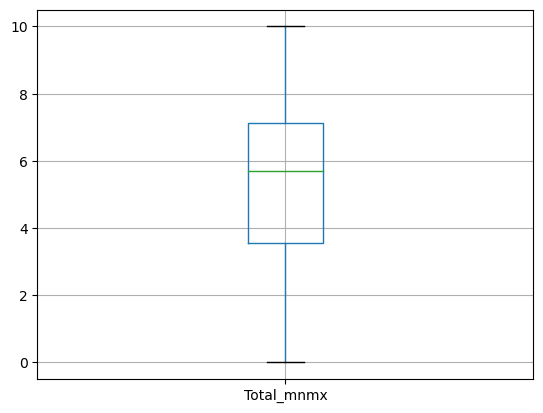

In [149]:
theMapAndData.boxplot(column=['Total_mnmx'])  

<Axes: >

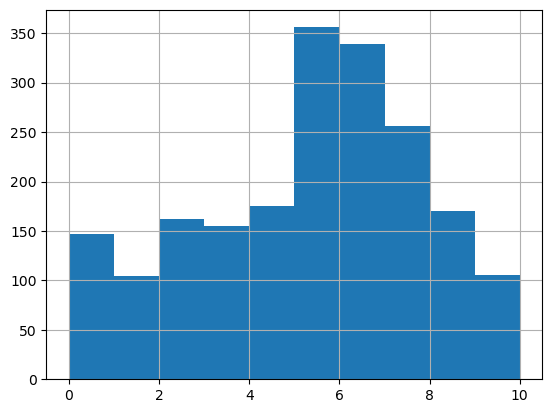

In [150]:
theMapAndData['Total_mnmx'].hist()

In [158]:
#pip show numba pysal mapclassify numpy


In [154]:
#pip install mapclassify

In [155]:
import mapclassify 
import numpy as np

In [157]:
np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.Total_mnmx
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K) 

#How can we select the right classification? Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

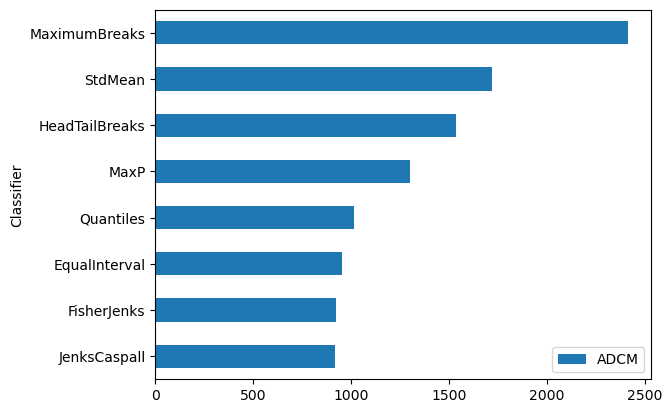

In [159]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')


In [160]:
theMapAndData.loc[:,'Total_ei5'] = ei5.yb
theMapAndData.loc[:,'Total_fj5'] = fj5.yb
theMapAndData.loc[:,'Total_jc5'] = jc5.yb

In [161]:
theMapAndData.head()

,COUNTRY,geometry,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,...,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2013,58.000000,4.9,3.7,4.1,4.5,5.6,...,4.400000,4.6,3.0,5.8,AG,ATG,4.171011,2,1,1
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2023,53.800000,4.9,3.7,3.6,6.6,5.1,...,3.800000,3.7,2.7,6.1,AG,ATG,4.034908,2,1,1
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2018,55.611041,5.7,3.7,3.6,4.8,4.2,...,4.411041,4.6,3.2,5.8,AG,ATG,3.948394,1,1,1
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2014,59.000000,4.9,3.7,4.1,4.5,5.3,...,4.700000,4.9,3.3,6.1,AG,ATG,4.278132,2,1,1
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2015,57.800000,5.2,3.7,3.9,5.0,5.0,...,4.500000,4.6,3.0,5.8,AG,ATG,4.142562,2,1,1


In [162]:
indexList=['Total_ei5','Total_fj5','Total_jc5']
aggregator={'Total_mnmx': ['mean']}

pd.concat([theMapAndData[['Total_mnmx',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,Total_ei5,Total_mnmx,Total_fj5,Total_mnmx,Total_jc5,Total_mnmx
,,mean,,mean,,mean
0,0,0.901965,0,0.937088,0,0.901965
1,1,3.027346,1,3.199770,1,3.193175
2,2,5.227688,2,5.433028,2,5.466820
3,3,6.906840,3,6.964059,3,6.940591
4,4,8.862077,4,8.766700,4,8.687480


In [163]:
theMapAndData.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Country                      1969 non-null   object  
 3   Year                         1969 non-null   int64   
 4   Total                        1969 non-null   float64 
 5   C1_SecurityApparatus         1969 non-null   float64 
 6   C2_FactionalizedElites       1969 non-null   float64 
 7   C3_GroupGrievance            1969 non-null   float64 
 8   E1_Economy                   1969 non-null   float64 
 9   E2_EconomicInequality        1969 non-null   float64 
 10  E3_HumanFlightandBrainDrain  1969 non-null   float64 
 11  P1_StateLegitimacy           1969 non-null   float64 
 12  P2_PublicServices            1969 non-null   float64 


In [164]:
newColNames=[ name+"_cat" for name in indexList]

theMapAndData[newColNames]=theMapAndData.loc[:,indexList]
theMapAndData.head()

,COUNTRY,geometry,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,...,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2013,58.000000,4.9,3.7,4.1,4.5,5.6,...,5.8,AG,ATG,4.171011,2,1,1,2,1,1
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2023,53.800000,4.9,3.7,3.6,6.6,5.1,...,6.1,AG,ATG,4.034908,2,1,1,2,1,1
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2018,55.611041,5.7,3.7,3.6,4.8,4.2,...,5.8,AG,ATG,3.948394,1,1,1,1,1,1
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2014,59.000000,4.9,3.7,4.1,4.5,5.3,...,6.1,AG,ATG,4.278132,2,1,1,2,1,1
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2015,57.800000,5.2,3.7,3.9,5.0,5.0,...,5.8,AG,ATG,4.142562,2,1,1,2,1,1


In [165]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData[newColNames]=theMapAndData.loc[:,newColNames].replace(newLabelsForLevels)
theMapAndData.drop(columns=['Country'],inplace=True)
theMapAndData

,COUNTRY,geometry,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,...,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2013,58.000000,4.900000,3.7,4.1,4.5,5.6,7.6,...,5.8,AG,ATG,4.171011,2,1,1,2_Middle,1_Good,1_Good
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2023,53.800000,4.900000,3.7,3.6,6.6,5.1,6.2,...,6.1,AG,ATG,4.034908,2,1,1,2_Middle,1_Good,1_Good
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2018,55.611041,5.700000,3.7,3.6,4.8,4.2,6.7,...,5.8,AG,ATG,3.948394,1,1,1,1_Good,1_Good,1_Good
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2014,59.000000,4.900000,3.7,4.1,4.5,5.3,7.6,...,6.1,AG,ATG,4.278132,2,1,1,2_Middle,1_Good,1_Good
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2015,57.800000,5.200000,3.7,3.9,5.0,5.0,7.3,...,5.8,AG,ATG,4.142562,2,1,1,2_Middle,1_Good,1_Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2020,82.663114,6.463114,8.3,5.6,7.2,6.5,7.3,...,8.9,TL,TLS,6.955837,3,3,3,3_Bad,3_Bad,3_Bad
1965,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2016,90.800000,7.400000,8.3,6.7,8.1,7.0,7.3,...,9.0,TL,TLS,7.563025,3,3,3,3_Bad,3_Bad,3_Bad
1966,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2017,90.500000,7.200000,8.3,6.5,7.9,6.8,7.6,...,9.5,TL,TLS,7.542017,3,3,3,3_Bad,3_Bad,3_Bad
1967,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2021,80.900000,6.200000,8.3,5.3,7.7,6.2,7.0,...,8.6,TL,TLS,6.774869,3,3,3,3_Bad,3_Bad,3_Bad


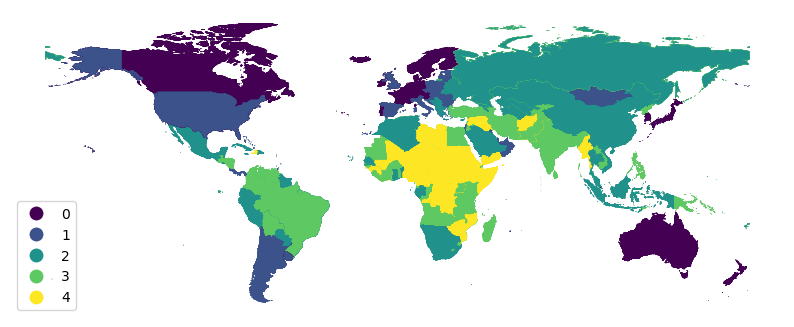

In [166]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"}, 
        ax=ax
       )

ax.set_axis_off()

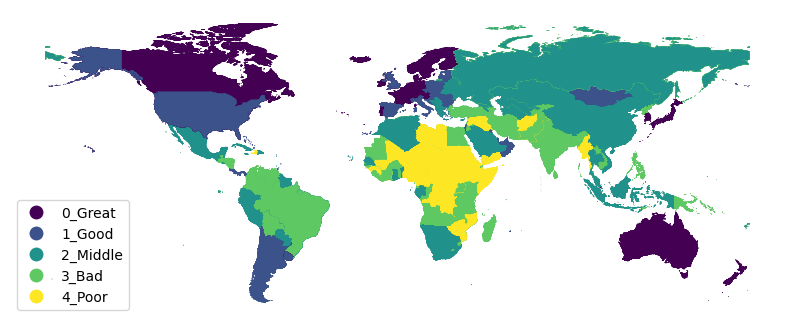

In [167]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5_cat', # annotated
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=1, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

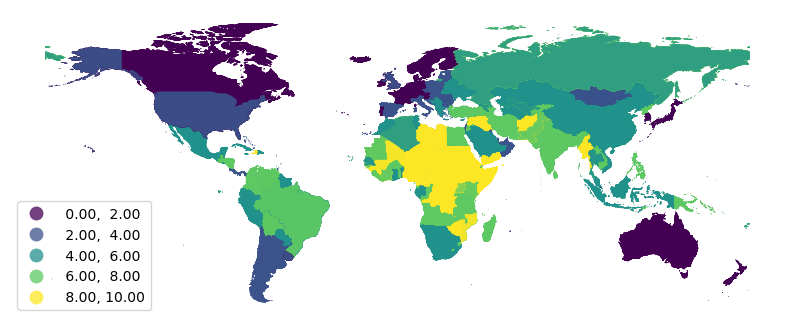

In [168]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_mnmx', 
        cmap='viridis', 
                   scheme="equal_interval",
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

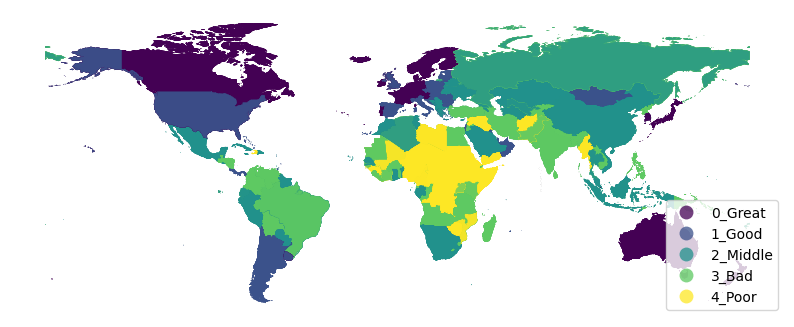

In [169]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5_cat', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':"lower right"},
        ax=ax
       )

ax.set_axis_off()

In [173]:
continents2=pd.read_csv(os.path.join("maps","continents2.csv"))

In [174]:
continents2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [172]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Year                         1969 non-null   int64   
 3   Total                        1969 non-null   float64 
 4   C1_SecurityApparatus         1969 non-null   float64 
 5   C2_FactionalizedElites       1969 non-null   float64 
 6   C3_GroupGrievance            1969 non-null   float64 
 7   E1_Economy                   1969 non-null   float64 
 8   E2_EconomicInequality        1969 non-null   float64 
 9   E3_HumanFlightandBrainDrain  1969 non-null   float64 
 10  P1_StateLegitimacy           1969 non-null   float64 
 11  P2_PublicServices            1969 non-null   float64 
 12  P3_HumanRights               1969 non-null   float64 


In [175]:
continents2.rename(columns={'alpha-2': 'iso2'}, inplace=True)

In [176]:
merged_data = theMapAndData.merge(continents2[['iso2', 'region']], on='iso2', how='left')

In [177]:
continent_column = merged_data['region']

In [178]:
theMapAndData['continent'] = continent_column

In [179]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Year                         1969 non-null   int64   
 3   Total                        1969 non-null   float64 
 4   C1_SecurityApparatus         1969 non-null   float64 
 5   C2_FactionalizedElites       1969 non-null   float64 
 6   C3_GroupGrievance            1969 non-null   float64 
 7   E1_Economy                   1969 non-null   float64 
 8   E2_EconomicInequality        1969 non-null   float64 
 9   E3_HumanFlightandBrainDrain  1969 non-null   float64 
 10  P1_StateLegitimacy           1969 non-null   float64 
 11  P2_PublicServices            1969 non-null   float64 
 12  P3_HumanRights               1969 non-null   float64 


In [180]:
theMapAndData

,COUNTRY,geometry,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,...,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat,continent
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2013,58.000000,4.900000,3.7,4.1,4.5,5.6,7.6,...,AG,ATG,4.171011,2,1,1,2_Middle,1_Good,1_Good,Americas
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2023,53.800000,4.900000,3.7,3.6,6.6,5.1,6.2,...,AG,ATG,4.034908,2,1,1,2_Middle,1_Good,1_Good,Americas
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2018,55.611041,5.700000,3.7,3.6,4.8,4.2,6.7,...,AG,ATG,3.948394,1,1,1,1_Good,1_Good,1_Good,Americas
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2014,59.000000,4.900000,3.7,4.1,4.5,5.3,7.6,...,AG,ATG,4.278132,2,1,1,2_Middle,1_Good,1_Good,Americas
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2015,57.800000,5.200000,3.7,3.9,5.0,5.0,7.3,...,AG,ATG,4.142562,2,1,1,2_Middle,1_Good,1_Good,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2020,82.663114,6.463114,8.3,5.6,7.2,6.5,7.3,...,TL,TLS,6.955837,3,3,3,3_Bad,3_Bad,3_Bad,Asia
1965,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2016,90.800000,7.400000,8.3,6.7,8.1,7.0,7.3,...,TL,TLS,7.563025,3,3,3,3_Bad,3_Bad,3_Bad,Asia
1966,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2017,90.500000,7.200000,8.3,6.5,7.9,6.8,7.6,...,TL,TLS,7.542017,3,3,3,3_Bad,3_Bad,3_Bad,Asia
1967,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2021,80.900000,6.200000,8.3,5.3,7.7,6.2,7.0,...,TL,TLS,6.774869,3,3,3,3_Bad,3_Bad,3_Bad,Asia


In [181]:
#extrayendo solo lo del contienente americano
america_data = theMapAndData[theMapAndData['continent'] == "Americas"]

In [182]:
america_data

,COUNTRY,geometry,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,...,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat,continent
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2013,58.000000,4.900000,3.700,4.1,4.5,5.6,7.600000,...,AG,ATG,4.171011,2,1,1,2_Middle,1_Good,1_Good,Americas
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2023,53.800000,4.900000,3.700,3.6,6.6,5.1,6.200000,...,AG,ATG,4.034908,2,1,1,2_Middle,1_Good,1_Good,Americas
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2018,55.611041,5.700000,3.700,3.6,4.8,4.2,6.700000,...,AG,ATG,3.948394,1,1,1,1_Good,1_Good,1_Good,Americas
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2014,59.000000,4.900000,3.700,4.1,4.5,5.3,7.600000,...,AG,ATG,4.278132,2,1,1,2_Middle,1_Good,1_Good,Americas
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2015,57.800000,5.200000,3.700,3.9,5.0,5.0,7.300000,...,AG,ATG,4.142562,2,1,1,2_Middle,1_Good,1_Good,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,VENEZUELA,"MULTIPOLYGON (((-60.25755 7.92157, -60.31973 7...",2020,91.157591,7.244253,9.152,7.3,8.7,6.6,6.350284,...,VE,VEN,7.824286,3,3,4,3_Bad,3_Bad,4_Poor,Americas
1866,VENEZUELA,"MULTIPOLYGON (((-60.25755 7.92157, -60.31973 7...",2016,81.600000,6.800000,8.200,7.4,7.0,6.9,5.200000,...,VE,VEN,6.596639,3,3,3,3_Bad,3_Bad,3_Bad,Americas
1867,VENEZUELA,"MULTIPOLYGON (((-60.25755 7.92157, -60.31973 7...",2017,82.900000,7.300000,8.200,7.2,7.3,6.7,5.500000,...,VE,VEN,6.743697,3,3,3,3_Bad,3_Bad,3_Bad,Americas
1868,VENEZUELA,"MULTIPOLYGON (((-60.25755 7.92157, -60.31973 7...",2021,92.600000,7.300000,9.300,7.0,9.8,6.7,6.500000,...,VE,VEN,8.000000,3,4,4,3_Bad,4_Poor,4_Poor,Americas


# Part II
Similar to Part I, do the CHALLENGE, using Python for coding, and R for plotting.
Challenge: 